## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5** 2+2+2+1

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [285]:
df = pd.read_csv('aptos.csv')

df.head(15)



,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- metros²: indica o tamanho do apartamento em metros².

- valor: indica o valor por metros².

- quartos: indica a quantidade de quartos por aparatamento.

- vagas: indica a quantidade de vagas por Apartamento.

- Reformado: indica se o apartamento foi reformado recentemente.

- Bairro: indica a localidade do imóvel.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  quanto mais metros² maior o valor total do apartamento
2.  quanto mais quartos maior o valor total do apartamento

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [286]:
#Seu Código aqui...
# Define o nome das colunas

header = ['metros', 'valor', 'quartos', 'vagas', 'reformados', 'bairro']

# Lê e carrega o arquivo para a memória

df = pd.read_csv("aptos.csv")




In [287]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


,metros,valor,quartos,vagas,reformado
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,80.280000,402.93000,2.590000,1.650000,0.540000
std,27.606206,171.43154,0.552222,0.687184,0.500908
min,43.000000,188.00000,2.000000,0.000000,0.000000
25%,56.750000,258.00000,2.000000,1.000000,0.000000
50%,72.000000,355.00000,3.000000,2.000000,1.000000
75%,100.000000,515.00000,3.000000,2.000000,1.000000
max,199.000000,880.00000,4.000000,4.000000,1.000000


**Valor / Metros**

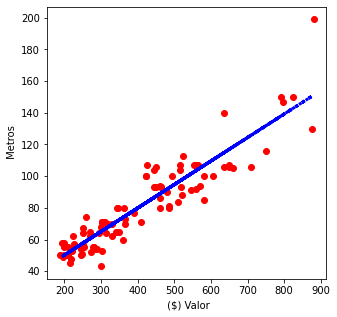

O modelo é: Valor = 20.452 + 0.14848X


In [290]:
#Seu Código aqui...

from   sklearn.linear_model import LinearRegression


X = df['valor'].values.reshape(-1,1)
y = df['metros'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

f_previsaoes = reg.predict(X)


plt.figure(figsize = (5,5))
plt.scatter(
    df['valor'], 
    df['metros'], 
    c='red')


plt.plot(
    df['valor'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Valor")
plt.ylabel(" Metros")
plt.show()


print("O modelo é: Valor = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


**Valor / Quartos**

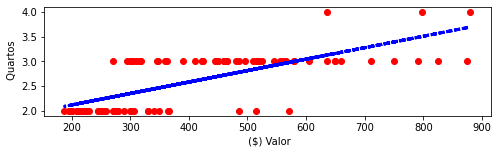

In [291]:
X = df['valor'].values.reshape(-1,1)
y = df['quartos'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

f_previsaoes = reg.predict(X)

plt.figure(figsize = (8,2))
plt.scatter(
    df['valor'], 
    df['quartos'], 
    c='red')


plt.plot(
    df['valor'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Valor")
plt.ylabel(" Quartos")
plt.show()

**Valor / Vagas**

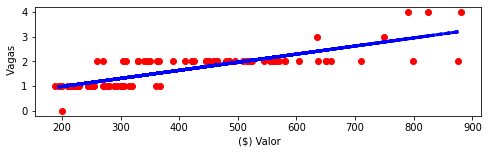

In [292]:
X = df['valor'].values.reshape(-1,1)
y = df['vagas'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

f_previsaoes = reg.predict(X)

plt.figure(figsize = (8,2))
plt.scatter(
    df['valor'], 
    df['vagas'], 
    c='red')


plt.plot(
    df['valor'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Valor")
plt.ylabel(" Vagas")
plt.show()

**Valor / Reformado**

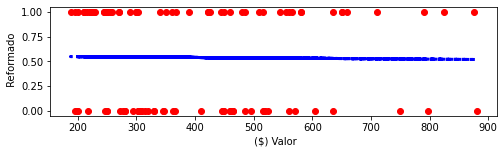

In [293]:
X = df['valor'].values.reshape(-1,1)
y = df['reformado'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

f_previsaoes = reg.predict(X)

plt.figure(figsize = (8,2))
plt.scatter(
    df['valor'], 
    df['reformado'], 
    c='red')


plt.plot(
    df['valor'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Valor")
plt.ylabel(" Reformado")
plt.show()

<AxesSubplot:xlabel='metros', ylabel='valor'>

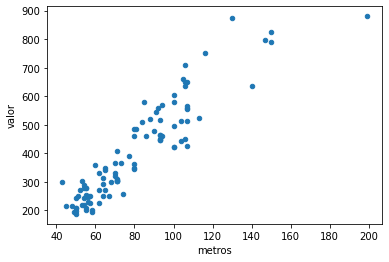

In [294]:
df.plot.scatter('metros', 'valor')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

**Resposta:**

    Usamos os gráficos boxplot e plot scatter para analisar os dados, foi localizado outliers. Os dados foram mantidos

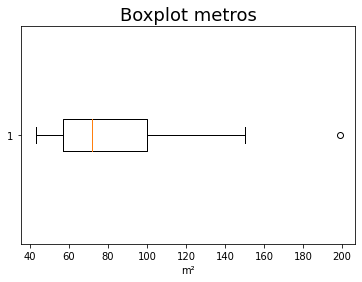

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize =(6, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df['metros'], vert = 0, patch_artist = False)

# Adicionando Título ao gráfico
plt.title("Boxplot metros", loc="center", fontsize=18)
plt.xlabel("m²")

plt.show()


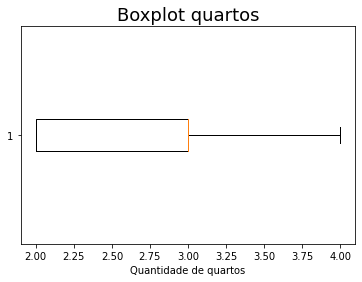

In [316]:
plt.figure(figsize =(6, 4))
bplots = plt.boxplot(df['quartos'], vert = 0, patch_artist = False)

# Adicionando Título ao gráfico
plt.title("Boxplot quartos", loc="center", fontsize=18)
plt.xlabel("Quantidade de quartos")
plt.show()


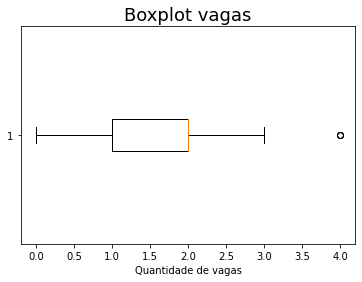

In [317]:
plt.figure(figsize =(6, 4))

bplots = plt.boxplot(df['vagas'], vert = 0, patch_artist = False)

# Adicionando Título ao gráfico
plt.title("Boxplot vagas", loc="center", fontsize=18)
plt.xlabel("Quantidade de vagas")
plt.show()

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
        *Pois utiliza dados já observados que possuem respostas ou classificações rotuladas
    [ ] Aprendizado não supervisionado
    
    

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo ...Linear
2. algoritimo ...Polinomial

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo ...É a forma mais simples de regressão. É uma técnica na qual a variável dependente é contínua na natureza. A relação entre a variável dependente e as variáveis independentes é assumida como **linear** por natureza.

2. algoritimo ...É uma técnica para ajustar uma equação não linear tomando funções **polinomiais** de variável independente.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [318]:


df = pd.read_csv('aptos.csv')

header = ['metros', 'valor', 'quartos', 'vagas', 'reformados', 'bairro']

X = df['valor'].values.reshape(-1, 1)
Y = df['metros'].values.reshape(-1, 1)


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [319]:
###################################################

# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

##################################################

# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)


(80, 1)
(20, 1)
(80, 1)
(20, 1)


LinearRegression()

In [320]:
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [[ 86.74686407]
 [ 62.09213274]
 [ 49.54063315]
 [110.65448232]
 [ 89.73531635]
 [ 91.97665556]
 [126.34385681]
 [ 52.67850805]
 [ 96.30991137]
 [ 83.31014394]
 [ 97.6547149 ]
 [ 52.37966282]
 [ 57.16118647]
 [ 65.52885286]
 [ 51.63254975]
 [139.49304685]
 [ 60.5979066 ]
 [ 94.21799477]
 [ 81.51707257]
 [ 87.49397714]]


In [321]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  [20.25380079]
(B) Inclinação:  [[0.14942261]]
Nossa equação é: Y_pred = [20.25] + [0.15] * X_LSTAT


Text(0, 0.5, 'Metros')

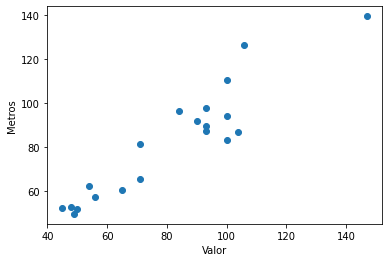

In [322]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor')
plt.ylabel('Metros')

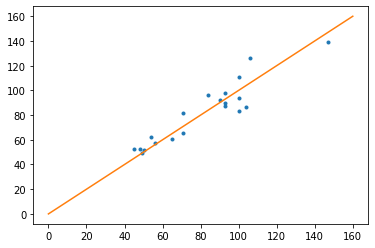

In [323]:
# plot prediction and actual data
y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 160, 100)
y = x
plt.plot(x, y)
plt.show()

Soma dos Erros ao Quadrado (SSE): 9647 
Erro Quadrático Médio (MSE): 96.47
Erro Médio Absoluto (MAE): 7.28
Raiz do Erro Quadrático Médio (RMSE): 9.82 
R2-score: 0.87


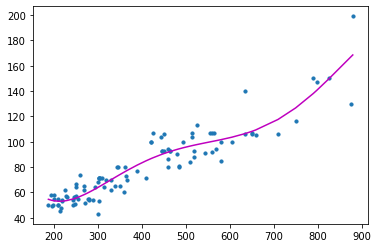

In [324]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

####
np.random.seed(0)
x = df['valor'].values
y = df['metros'].values

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#----É aqui que o seu código muda

# Chama a função definindo o grau do polinomio e aplica o modelo
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')
plt.show()

### Algoritmo 2

In [325]:
#Seu Código aqui...







Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | 0.87 | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [334]:
#Seu Código aqui...
df = pd.read_csv('aptos.csv')
df_bairro = df.drop(df[df['bairro'] != 'Centro'].index)
bairroMediaValor = df_bairro['valor'].mean()

df_vagas = df.drop(df[df['vagas'] != 2].index)
vagasMediaValor = df_vagas['valor'].mean()

df_reformado = df.drop(df[df['reformado'] != 0].index)
reformadoMediaValor = df_reformado['valor'].mean()

df_quartos = df.drop(df[df['quartos'] != 2].index)
quartosMediaValor = df_quartos['valor'].mean()

df_metros = df[df['metros'] == 65]
metrosMediaValor = df_metros['valor'].mean()
valor = (bairroMediaValor + vagasMediaValor + reformadoMediaValor + quartosMediaValor + metrosMediaValor)/5
print('Valor : {:.6} '.format(valor))


Valor : 392.932 


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, porém poderia ser aplicado técnicas aprimoradas de IA para chegar ao resultado

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Usaria as melhores ferramentas de IA para chegar ao resultado




